<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/Company_Bankruptcy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'company-bankruptcy-prediction' dataset.
Path to dataset files: /kaggle/input/company-bankruptcy-prediction


**Data Evaluation**

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv(path + "/data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
df.shape

(6819, 96)

In [4]:
df['Bankrupt?'].value_counts()

,count
Bankrupt?,
0,6599
1,220


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
df['Bankrupt?'].value_counts()

,count
Bankrupt?,
0,6599
1,220


**0 --> Not Bankrupt**

**1 --> Bankrupt**

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

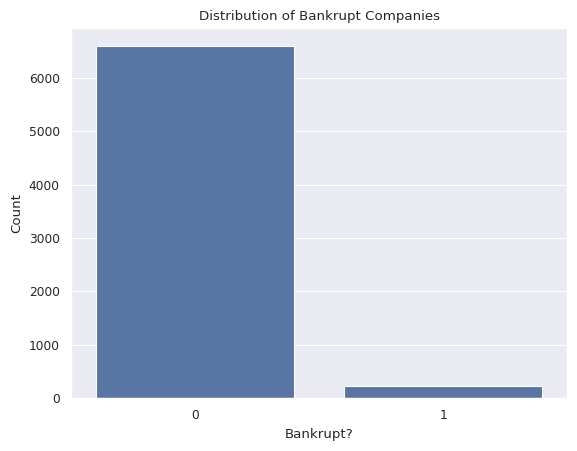

In [13]:
sns.countplot(x='Bankrupt?', data=df)
plt.title('Distribution of Bankrupt Companies')
plt.xlabel('Bankrupt?')
plt.ylabel('Count')
plt.show()

**Exploratory Data Analysis**

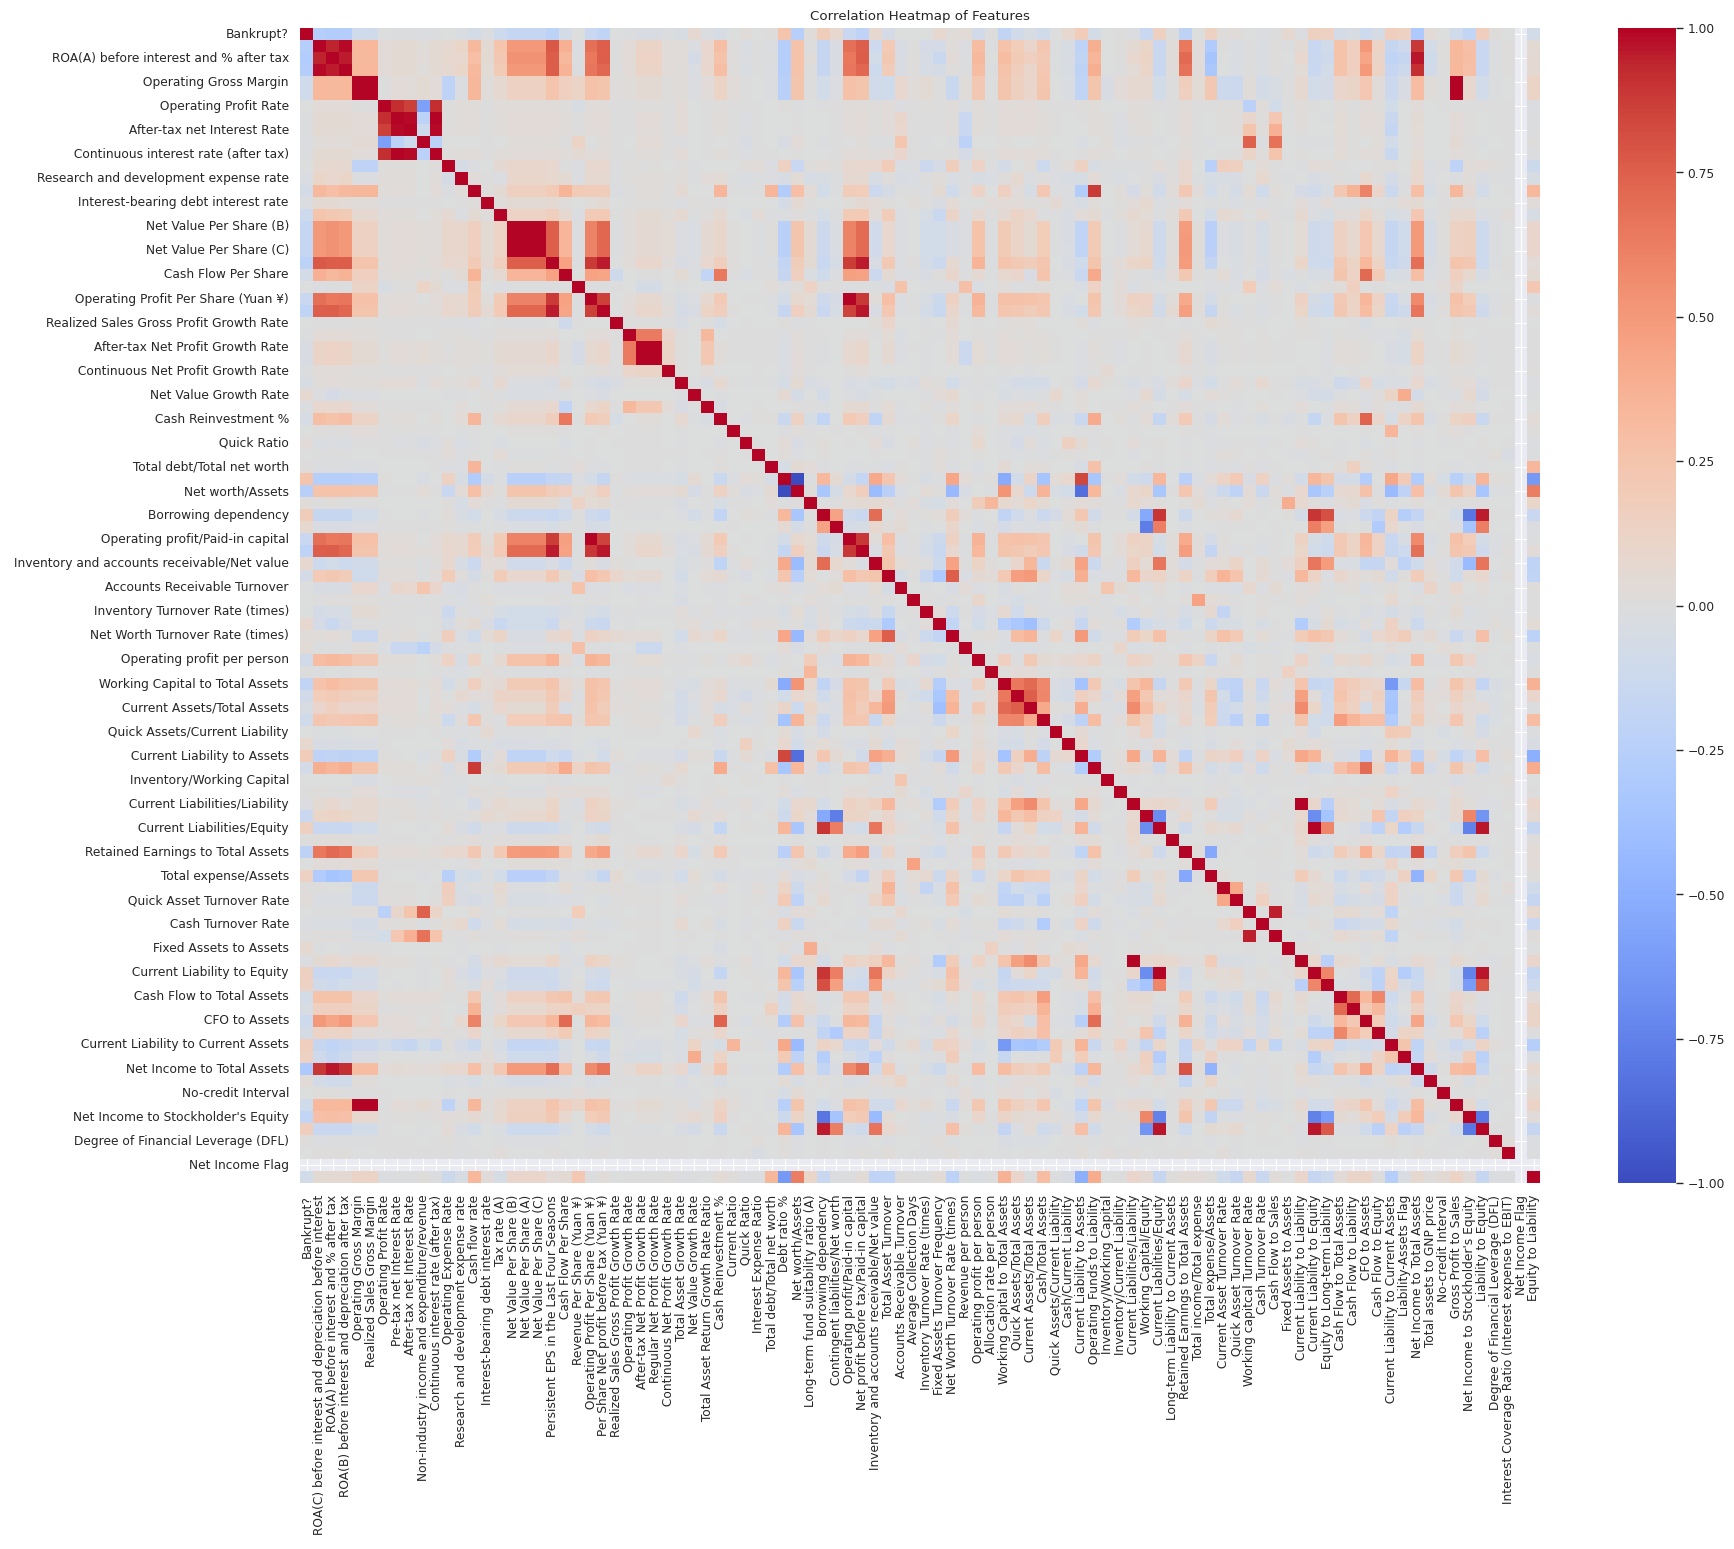

In [14]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15)) # Adjust figure size as needed
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False) # annot=False to avoid overcrowding with values
plt.title('Correlation Heatmap of Features')
plt.show()

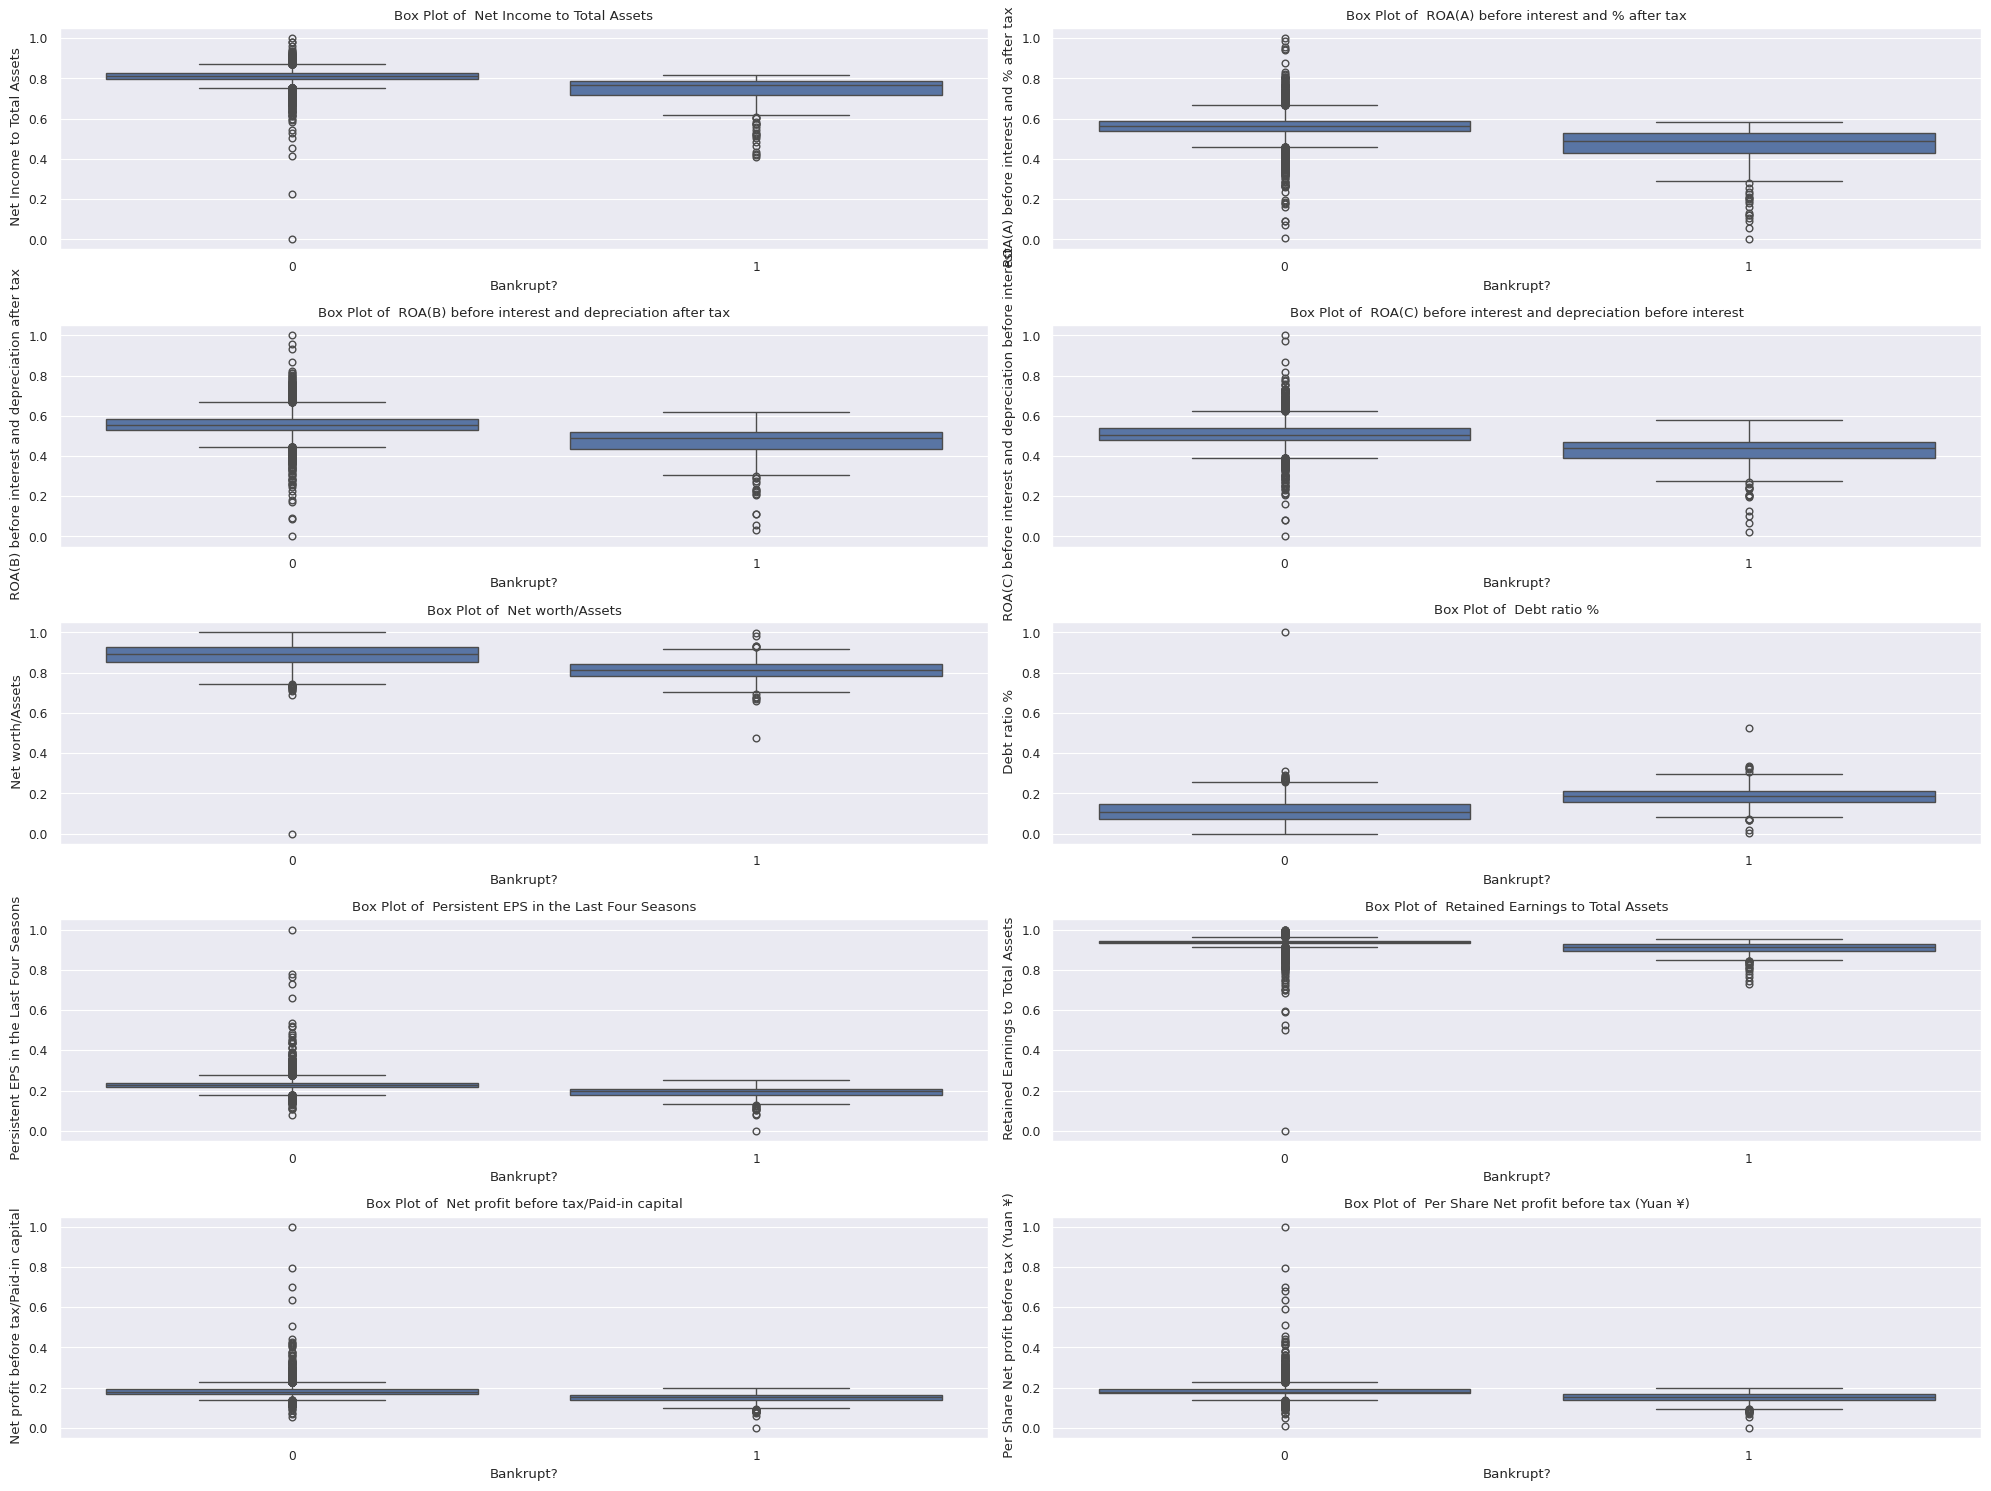

In [15]:
# Get the absolute correlations with 'Bankrupt?'
bankrupt_corr = corr_matrix['Bankrupt?'].abs().sort_values(ascending=False)

# Get the names of the top 10 correlated features (excluding 'Bankrupt?')
top_10_features = bankrupt_corr.drop('Bankrupt?').head(10).index.tolist()

# Generate box plots for the top 10 features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(top_10_features):
    plt.subplot(5, 2, i + 1) # Adjust the subplot grid as needed
    sns.boxplot(x='Bankrupt?', y=feature, data=df)
    plt.title(f'Box Plot of {feature}')
    plt.xlabel('Bankrupt?')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

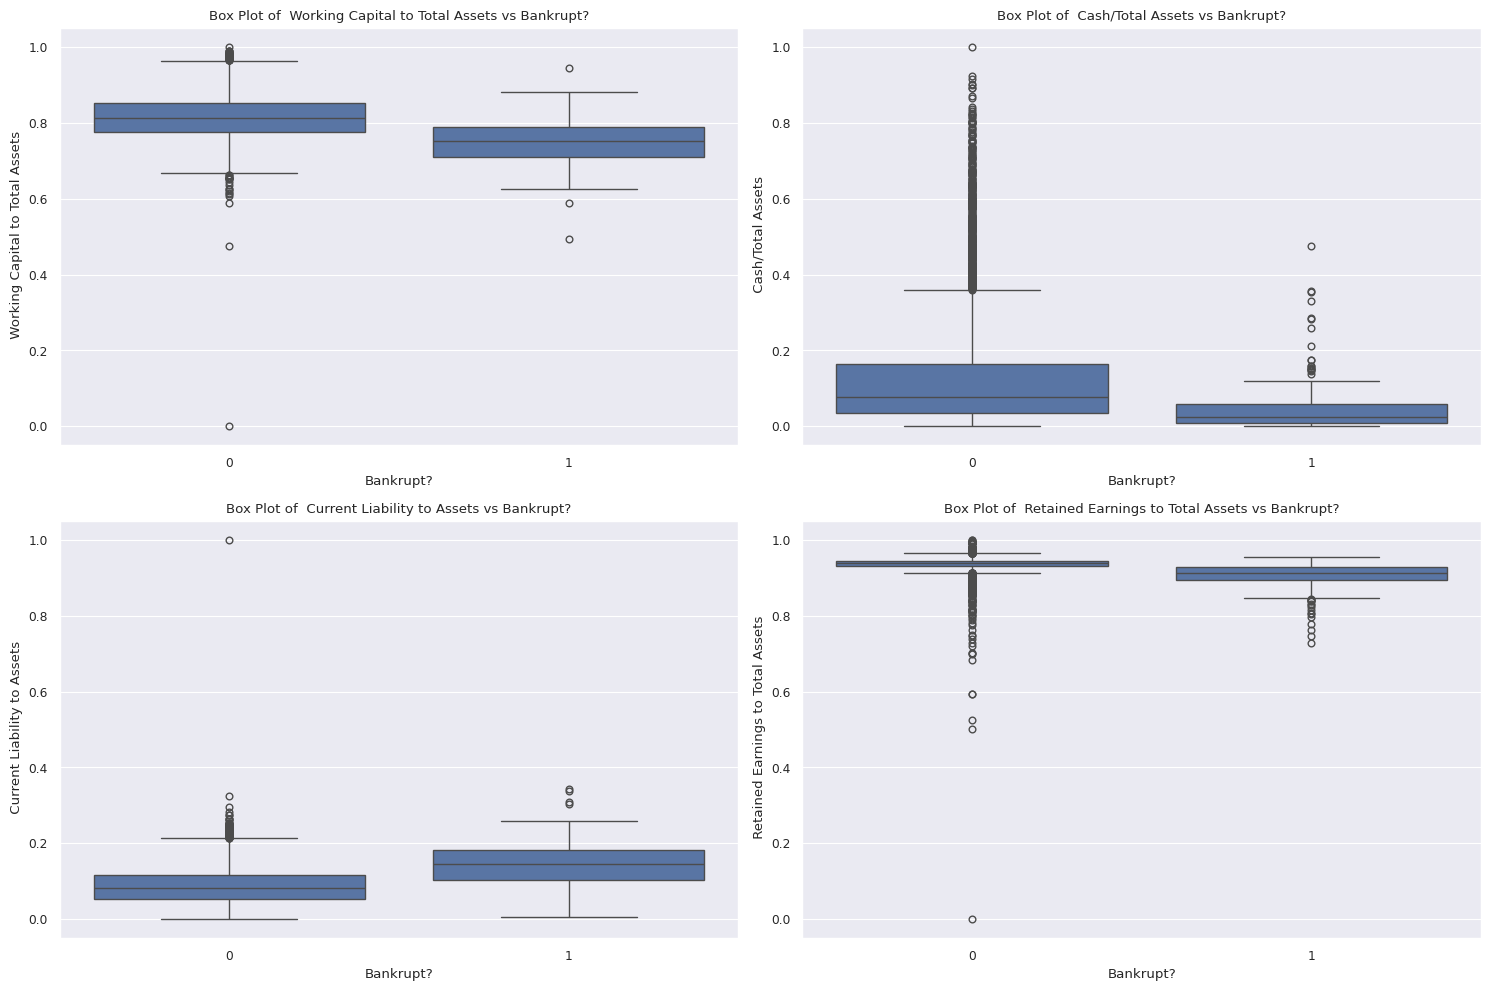

In [16]:
features_to_plot = [
    ' Working Capital to Total Assets',
    ' Cash/Total Assets',
    ' Current Liability to Assets',
    ' Retained Earnings to Total Assets'
]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Bankrupt?', y=feature, data=df)
    plt.title(f'Box Plot of {feature} vs Bankrupt?')
    plt.xlabel('Bankrupt?')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

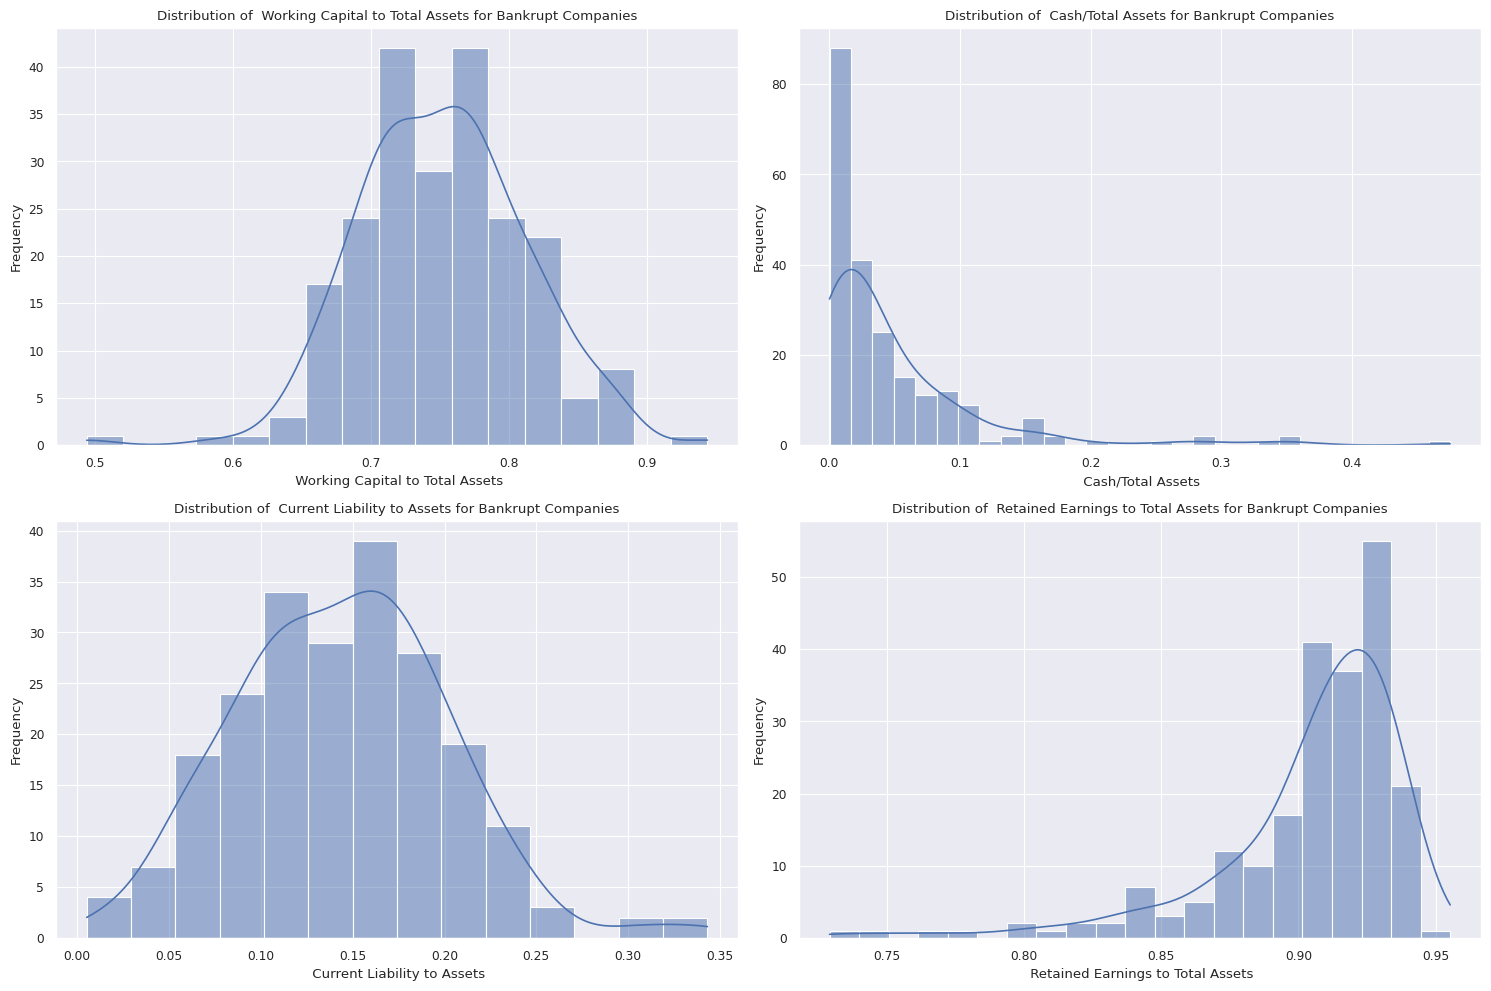

In [17]:
bankrupt_df = df[df['Bankrupt?'] == 1]

features_to_hist = [
    ' Working Capital to Total Assets',
    ' Cash/Total Assets',
    ' Current Liability to Assets',
    ' Retained Earnings to Total Assets'
]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_hist):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=bankrupt_df, x=feature, kde=True)
    plt.title(f'Distribution of {feature} for Bankrupt Companies')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Outlier Removal**

In [18]:
def remove_outliers_iqr(df, features, iqr_multiplier=1.5):
    """
    Removes outliers from specified features in a DataFrame using the IQR method.

    Args:
        df: The input pandas DataFrame.
        features: A list of feature names to remove outliers from.
        iqr_multiplier: The multiplier for the IQR to determine outlier bounds.

    Returns:
        A new DataFrame with outliers removed from the specified features.
    """
    filtered_df = df.copy()
    for feature in features:
        Q1 = filtered_df[feature].quantile(0.25)
        Q3 = filtered_df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        filtered_df = filtered_df[(filtered_df[feature] >= lower_bound) & (filtered_df[feature] <= upper_bound)]
    return filtered_df

In [19]:
features_to_hist = [
    ' Working Capital to Total Assets',
    ' Cash/Total Assets',
    ' Current Liability to Assets',
    ' Retained Earnings to Total Assets'
]

df_filtered = remove_outliers_iqr(df, features_to_hist, iqr_multiplier=1.5)
display(df_filtered.head())

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826


Shape of original DataFrame: (6819, 96)
Shape of filtered DataFrame: (5643, 96)


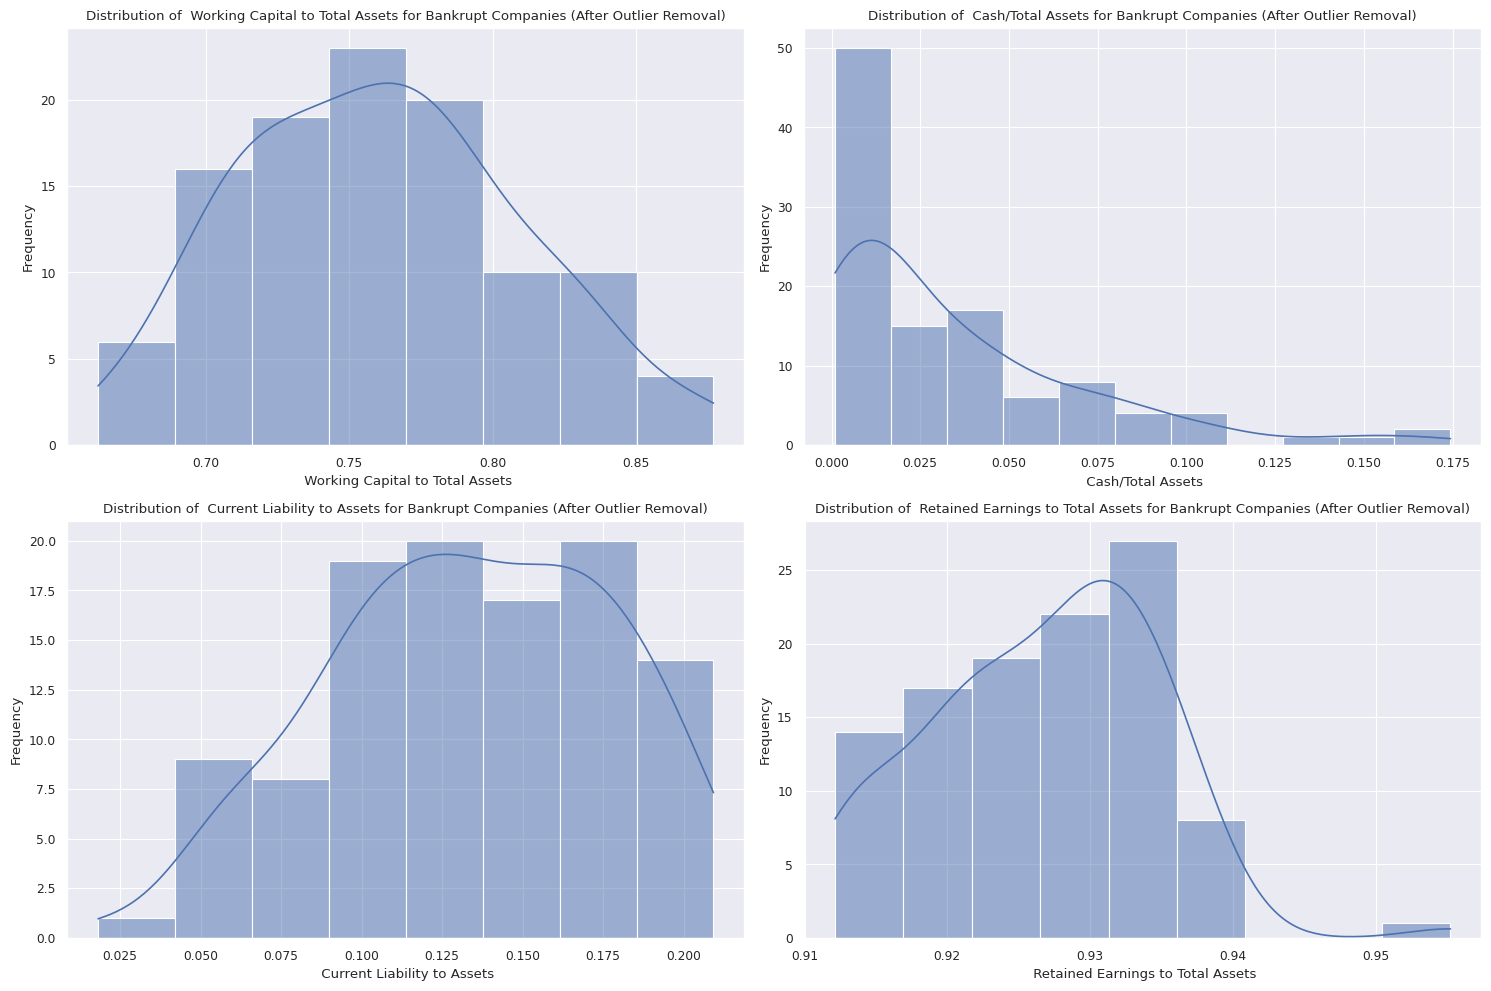

In [20]:
print("Shape of original DataFrame:", df.shape)
print("Shape of filtered DataFrame:", df_filtered.shape)

bankrupt_df_filtered = df_filtered[df_filtered['Bankrupt?'] == 1]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_hist):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=bankrupt_df_filtered, x=feature, kde=True)
    plt.title(f'Distribution of {feature} for Bankrupt Companies (After Outlier Removal)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:
df_filtered['Bankrupt?'].value_counts()

,count
Bankrupt?,
0,5535
1,108


**Splitting the target and the features**

In [34]:
# Separate features (X) and target (y)
X = df_filtered.drop('Bankrupt?', axis=1)
y = df_filtered['Bankrupt?']

**Initialize StratifiedKFold and SMOTE**

In [23]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

In [24]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [25]:
smote = SMOTE(random_state=42)

**Iterate through folds**


Start a loop to iterate through the splits generated by StratifiedKFold.



In [26]:
for train_index, val_index in skf.split(X, y):
    # The loop body will be implemented in subsequent steps
    pass


Split the data into training and validation sets for the current fold using the generated indices.



In [27]:
for train_index, val_index in skf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    # The loop body will be implemented in subsequent steps
    pass


Apply SMOTE to the training data for the current fold to handle class imbalance.



In [28]:
for train_index, val_index in skf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    # The loop body will be implemented in subsequent steps
    pass

**Model Training (Random Forrest)**


Train the model on the resampled training data within each fold of the cross-validation loop.



In [29]:
from sklearn.ensemble import RandomForestClassifier

for train_index, val_index in skf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_resampled, y_train_resampled)


**Model Evaluation**

In [30]:
from sklearn.metrics import classification_report, roc_auc_score

# Initialize lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []

for train_index, val_index in skf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the original validation data
    y_pred = model.predict(X_val_fold)
    y_proba = model.predict_proba(X_val_fold)[:, 1] # Get probabilities for AUC

    # Calculate evaluation metrics
    report = classification_report(y_val_fold, y_pred, output_dict=True)
    accuracy_scores.append(report['accuracy'])
    precision_scores.append(report['1']['precision'])
    recall_scores.append(report['1']['recall'])
    f1_scores.append(report['1']['f1-score'])
    auc_scores.append(roc_auc_score(y_val_fold, y_proba))


**Mean Performance Metrics**

In [31]:
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_auc = np.mean(auc_scores)

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-score: {mean_f1:.4f}")
print(f"Mean AUC: {mean_auc:.4f}")

Mean Accuracy: 0.9725
Mean Precision: 0.3175
Mean Recall: 0.3143
Mean F1-score: 0.3121
Mean AUC: 0.9143


**Confusion Matrix on Test Set**

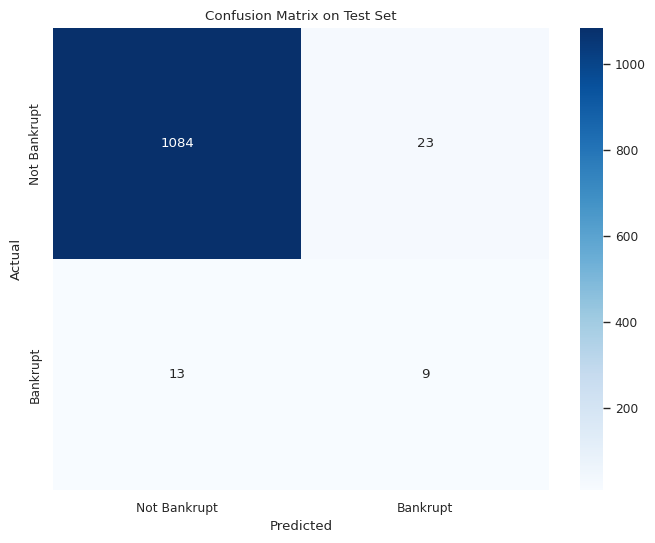

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) using the filtered data
X = df_filtered.drop('Bankrupt?', axis=1)
y = df_filtered['Bankrupt?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Train a final model on the resampled training data
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_test = final_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Bankrupt', 'Bankrupt'], yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Set')
plt.show()


**Data Analysis Key Findings**

*   The average accuracy of the model across the 5 folds was 0.9725.
*   The average precision for the positive class was 0.3175.
*   The average recall for the positive class was 0.3143.
*   The average F1-score for the positive class was 0.3121.
*   The average AUC score across the folds was 0.9143.

